In [34]:
# Functional imports
import os 
import numpy as np
import nibabel as nib
from nilearn.image import threshold_img

from data_prep_helpers import make_vol, calculate_difference
from plotting_helpers import plot_lateral_only, plot_lateral_only_with_vmax, plot_surfaces, plot_surfaces_with_vmax

# Notebook specific imports
import warnings
import sys 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
import matplotlib.pyplot as plt
%autosave 5

Autosaving every 5 seconds


<h2>Setup</h2>

In [14]:
# Set data location
directory = os.path.join(os.path.expanduser('~'), 'Documents', 'Data')
print('Data location:', directory)

# Load masks
gm_mask = nib.load(os.path.join(directory, 'group_gm_mask.nii.gz'))
encoding_mask = nib.load(os.path.join(directory, 'social_only_encoding_mask.nii.gz'))
print('Mask:', np.shape(encoding_mask))

Data location: /Users/angira/Documents/Data
Mask: (79, 95, 68)


In [15]:
# Load adult scores
path = os.path.join(directory, 'adults', 'encoding_results', 'thresholded')
social_thresholded_adults = np.load(os.path.join(path, 'adults_social_only_scores_gm_mask_thresholded05.npy'))

In [16]:
# Load child social cores
path = os.path.join(directory, 'adult_mask_encoding_results')

social_thresholded_34yrs = np.load(
    os.path.join(path, '3-4-yrs', '3-4-yrs_social_only_scores_adult_social_encoding_mask_thresholded05.npy'))

social_thresholded_5yrs = np.load(
    os.path.join(path, '5-yrs', '5-yrs_social_only_scores_adult_social_encoding_mask_thresholded05.npy'))

social_thresholded_7yrs = np.load(
    os.path.join(path, '7-yrs', '7-yrs_social_only_scores_adult_social_encoding_mask_thresholded05.npy'))

In [19]:
# Load unthresholded differences
path = os.path.join(directory, 'adult_mask_encoding_results')

social_difference_34yrs = np.load(
    os.path.join(path, '3-4-yrs', '3-4-yrs_social_difference_adult_social_encoding_mask.npy'))

social_difference_5yrs = np.load(
    os.path.join(path, '5-yrs', '5-yrs_social_difference_adult_social_encoding_mask.npy'))

social_difference_7yrs = np.load(
    os.path.join(path, '7-yrs', '7-yrs_social_difference_adult_social_encoding_mask.npy'))

In [29]:
# Load child social difference p values

# Load child social cores
path = os.path.join(directory, 'adult_mask_encoding_results')

social_p_34yrs = np.load(
    os.path.join(path, '3-4-yrs', '3-4-yrs_social_difference_adult_social_encoding_mask_p_values.npy'))

social_p_5yrs = np.load(
    os.path.join(path, '5-yrs', '5-yrs_social_difference_adult_social_encoding_mask_p_values.npy'))

social_p_7yrs = np.load(
    os.path.join(path, '7-yrs', '7-yrs_social_difference_adult_social_encoding_mask_p_values.npy'))

<h2>Thresholded encoding results</h2>

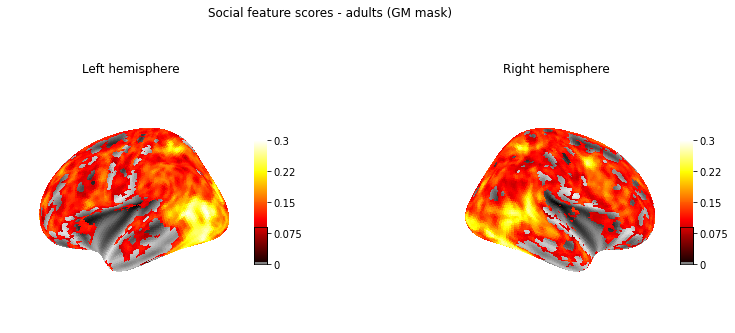

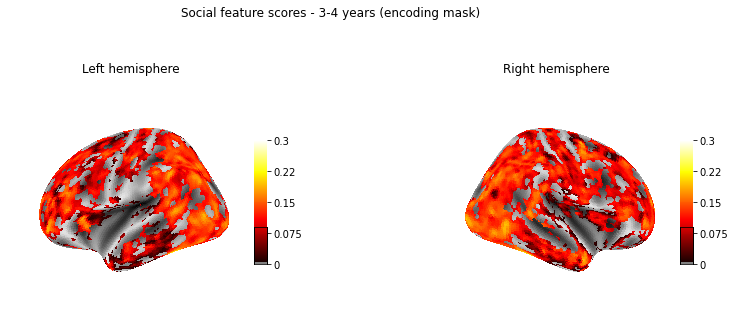

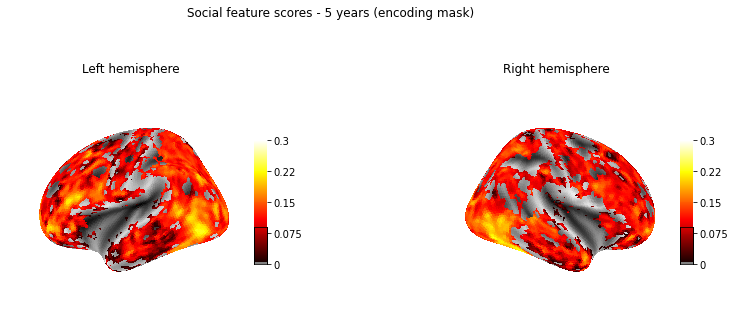

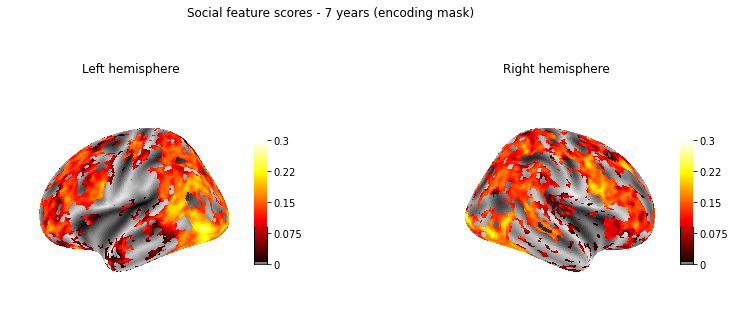

In [17]:
plot_lateral_only_with_vmax(vol=make_vol(social_thresholded_adults, gm_mask), 
                            title='Social feature scores - adults (GM mask)', 
                            vis_threshold=0.01, vmax=0.3)

plot_lateral_only_with_vmax(vol=make_vol(social_thresholded_34yrs, encoding_mask), 
                            title='Social feature scores - 3-4 years (encoding mask)', 
                            vis_threshold=0.01, vmax=0.3)

plot_lateral_only_with_vmax(vol=make_vol(social_thresholded_5yrs, encoding_mask), 
                            title='Social feature scores - 5 years (encoding mask)', 
                            vis_threshold=0.01, vmax=0.3)

plot_lateral_only_with_vmax(vol=make_vol(social_thresholded_7yrs, encoding_mask), 
                            title='Social feature scores - 7 years (encoding mask)', 
                            vis_threshold=0.01, vmax=0.3)

<h2>Unthresholded differences</h2>

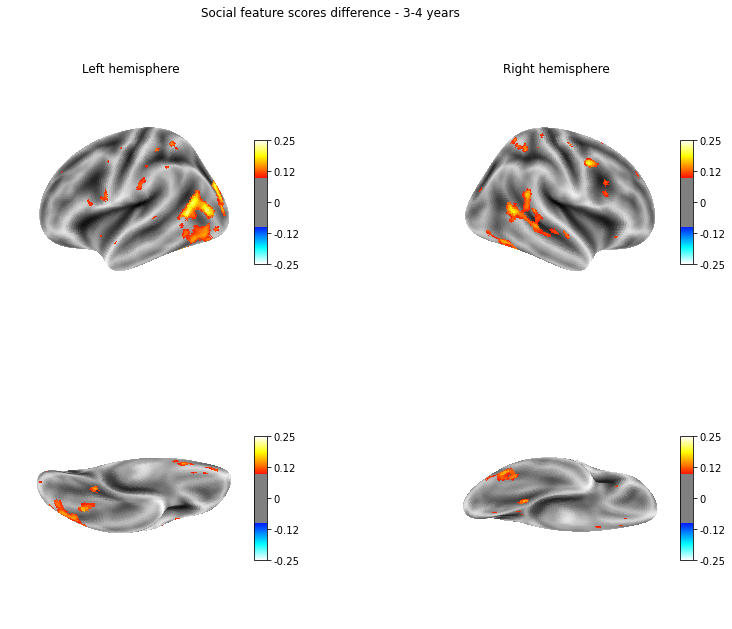

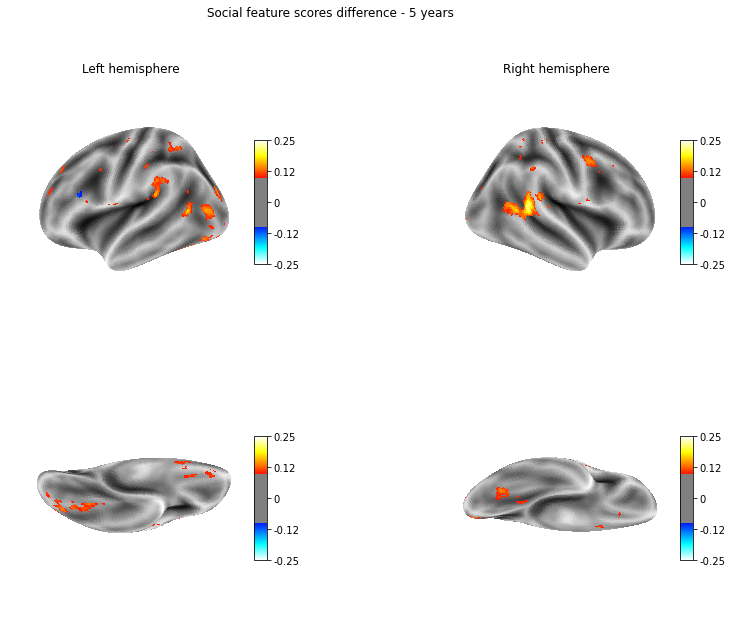

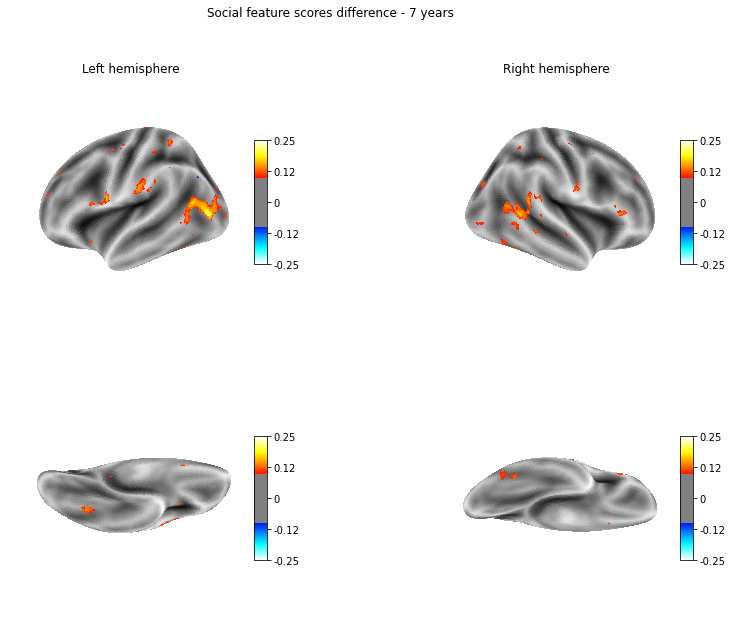

In [35]:
plot_surfaces_with_vmax(vol=make_vol(social_difference_34yrs, encoding_mask), 
                            title='Social feature scores difference - 3-4 years', 
                            vis_threshold=0.1, vmax=0.25)

plot_surfaces_with_vmax(vol=make_vol(social_difference_5yrs, encoding_mask), 
                            title='Social feature scores difference - 5 years', 
                            vis_threshold=0.1, vmax=0.25)

plot_surfaces_with_vmax(vol=make_vol(social_difference_7yrs, encoding_mask), 
                            title='Social feature scores difference - 7 years', 
                            vis_threshold=0.1, vmax=0.25)

<h2>Difference p values</h2>

3-4 years: 28735 p: 0.00018515089798185522 q: 0.5558862824475959
5 years: 28690 p: 0.00019603999215840032 q: 0.825264854842544
7 years: 28733 p: 0.00019603999215840032 q: 0.8995183801730093


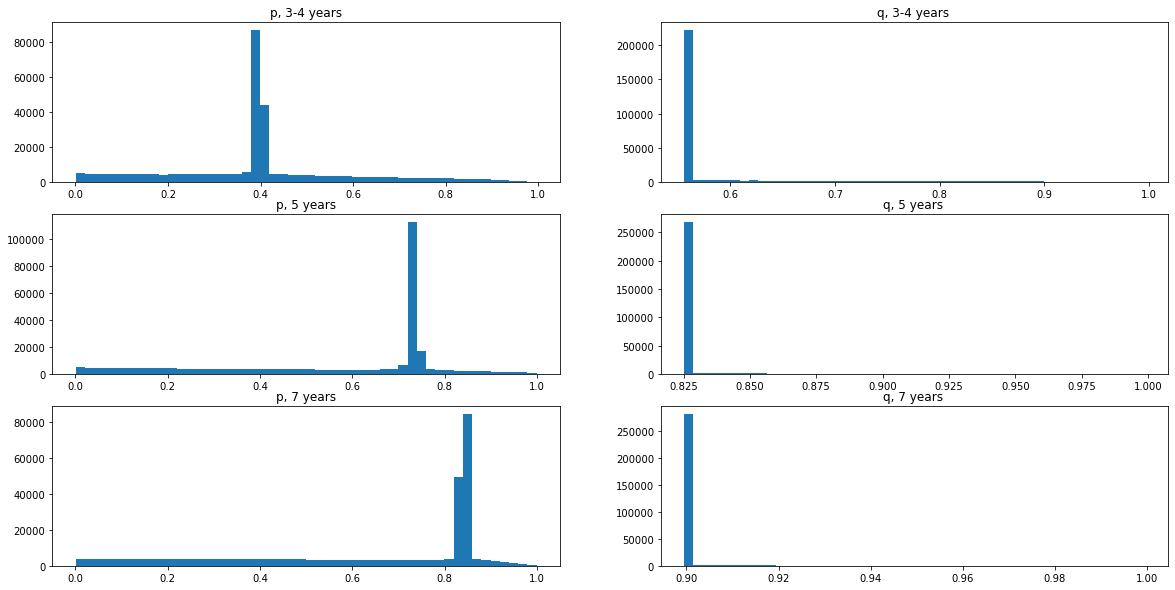

In [33]:
from statsmodels.stats.multitest import multipletests

social_q_34yrs = multipletests(social_p_34yrs, method='fdr_bh')[1]
print('3-4 years:', np.argmin(social_p_34yrs), 
      'p:', social_p_34yrs[np.argmin(social_p_34yrs)], 
      'q:', social_q_34yrs[np.argmin(social_p_34yrs)])

social_q_5yrs = multipletests(social_p_5yrs, method='fdr_bh')[1]
print('5 years:', np.argmin(social_p_5yrs), 
      'p:', social_p_5yrs[np.argmin(social_p_5yrs)], 
      'q:', social_q_5yrs[np.argmin(social_p_5yrs)])

social_q_7yrs = multipletests(social_p_7yrs, method='fdr_bh')[1]
print('7 years:', np.argmin(social_p_7yrs), 
      'p:', social_p_7yrs[np.argmin(social_p_7yrs)], 
      'q:', social_q_7yrs[np.argmin(social_p_7yrs)])

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20,10))
ax[0][0].hist(social_p_34yrs, bins=50)
ax[0][0].title.set_text('p, 3-4 years')
ax[0][1].hist(social_q_34yrs, bins=50)
ax[0][1].title.set_text('q, 3-4 years ')

ax[1][0].hist(social_p_5yrs, bins=50)
ax[1][0].title.set_text('p, 5 years')
ax[1][1].hist(social_q_5yrs, bins=50)
ax[1][1].title.set_text('q, 5 years ')

ax[2][0].hist(social_p_7yrs, bins=50)
ax[2][0].title.set_text('p, 7 years')
ax[2][1].hist(social_q_7yrs, bins=50)
ax[2][1].title.set_text('q, 7 years ')
